# 다항회귀와 과대적합/과소적합의 이해

- 독립변수(feature)와 종속변수(target)가 하나일순 없다.
- 회귀가 독립변수의 단항식이 아닌 2,3차 방정식과 같은 다항식으로 표현된 것을 다항(polynomial)회귀라고 한다.
- 다항회귀는 비선형 회귀가 아니라 선형회귀임을 주의
- 사이킷런은 다항 회귀를 위한 클래스를 제공하지 않아서 비선형 함수를 선형 모델에 적용시키는 방법으로 구현한다.
    - 사이킷런의 PolynomialFeatures클래스를 통해 feature를 Polynomial(다항식) feature로 변환한다.

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [2]:
# 다항식으로 변환한 단항식 생성
X = np.arange(4).reshape(2,2)
print(X)

[[0 1]
 [2 3]]


In [3]:
# PolynomialFeatures로 degree=2 인 2차 다항식으로 변환
# degree는 몇차로 바꿀건지 설정
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변한된 2차 다항식 계수 피처:\n', poly_ftr)

변한된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


## 3차 다항회귀 결정 함수를 임의로 설정하고 회귀 계수로 예측하기

In [4]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


- 3차 다항식 변환은 단항계수feature [x1, x2]를 3차 다항 계수 [1, x1, x2,x1², x1*x2, x2², x1³, x1²*x2, x1*x2², x2³]과 같이 10개의 다항 계수로 변환한다.

In [5]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [6]:
# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수 :\n', np.round(model.coef_,2))
print('Polynomial 회귀 shape :\n', model.coef_.shape)

Polynomial 회귀 계수 :
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape :
 (10,)


## 사이킷런의 Pipeline 객체로 한번에 다항회귀 구현

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [8]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# pipeline 객체로 Streamline하게 Polinomial Feature 변환과 LinearRegression 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해

- 차수(degree)가 높을수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 오히려 예측 정확도가 떨어진다. 즉, 과적합 문제 발생. 
- 원래 데이터 세트는 피처X와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계를 가지도록 만들어준다.
- 그리고 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측정확도를 비교하는 예제이다

- 학습데이터는 30개의 임의의 데이터인 X, X의 코사인 값에서 약간의 잡음 변동값을 더한 target인 y로 구성

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [10]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_func(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

y = true_func(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61]입니다
Degree 1 MSE는 0.40772896250986834입니다

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다
Degree 4 MSE는 0.04320874987231747입니다

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]입니다
Degree 15 MSE는 182815433.47648773입니다


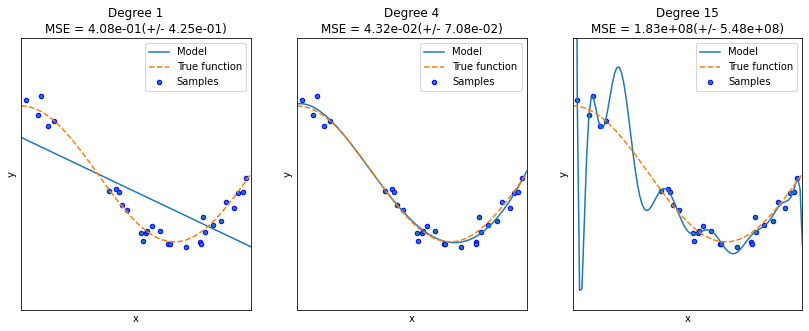

In [17]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수를 1,4,15로 각각 변환시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax,xticks=(), yticks=())
    
    # 개별 degree별로 polynomial변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    # 교차검증으로 다항회귀 평가하기
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    
    # pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다' .format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1}입니다'.format(degress[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터셋을 100개로 나눠 예측 수행
    X_test = np.linspace(0,1,100)
    
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_func(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})" .format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

- degree1 그래프
    - degree1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같다. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순하다. 
    - 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이다. 
    - MSE값은 약 0.41
- degree4 그래프
    - degree4 예측 곡선은 실제 데이터 세트와 유사한 모습이다. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었다.
    - MSE 값은 약 0.04로 가장 뛰어난 예측 성능을 나타내고 있다.
- degree 15 그래프
    - degree15 예측 곡선은 MSE 값이 182581084.83이 될 정도로 어처구니없는 오류값이 발생했다. 과(대)적합 모델이다.
    - 데이터 세트의 변동 잡음값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다. 
    - 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었다.